In [3]:
import sys
sys.path.insert(0, 'D:/Github/EnsemblePursuit')
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import sys
sys.path.append("..")

#Notice you need the PCA in utils, because it relies on SVD and we need the singular values for the image approximation
from EnsemblePursuit import utils
from EnsemblePursuit.utils import test_train_split,subtract_spont
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ridge_regression
from scipy.stats import zscore

In [5]:
#Load in data
data_path='H:/DATA/downloads/natimg2800_M170717_MP034_2017-09-11.mat' 

#data_path='/home/maria/Documents/EnsemblePursuit_old/experiments/natimg2800_M170717_MP034_2017-09-11.mat'
data = io.loadmat(data_path)
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp)

X = utils.zscore(X, axis=1)

In [6]:
#Fit model
model=EnsemblePursuit(n_components=150,lam=0.01,n_kmeans=25)
model.fit(X)

obtained 25 PCs in 1.3993 seconds
initialized 25 clusters with k-means in 8.6449 seconds
ensemble 0, time 2.10, nr neurons 1452, EV 0.0042
ensemble 25, time 23.07, nr neurons 180, EV 0.0321
ensemble 50, time 34.07, nr neurons 100, EV 0.0448
ensemble 75, time 41.93, nr neurons 89, EV 0.0542
ensemble 100, time 47.53, nr neurons 33, EV 0.0621
ensemble 125, time 52.47, nr neurons 30, EV 0.0684
ensemble 149, time 55.77, nr neurons 38, EV 0.0736
average sparsity is 0.0127


In [9]:
from sklearn.decomposition import PCA
import cv2

im_path='H:/DATA/downloads/images_natimg2800_all.mat'
stim_path=data_path

img=io.loadmat(im_path)['imgs']
ishape = (img.shape[0]//5, img.shape[1]//5)
images = np.zeros((2800, ) + (ishape[0], ishape[1]))
for j in range(images.shape[0]):
    images[j] = cv2.resize(img[:,:,j], (ishape[1], ishape[0]))

print(np.mean(images))
images = images.reshape((2800, -1))
#images = np.abs(images - 128)
images = utils.zscore(images, axis=1)

#images /= np.sum(images**2, axis=1)[:, np.newaxis]**.5

#model = PCA(n_components = 100).fit(images)
#comps = model.components_
#images @ comps.T

stim = data['stim']['istim'][0][0].astype(np.int32)

#V = X[isort[:150], :].T #
V = model.components_
x_train,x_test,y_train,y_test=test_train_split(V,stim)
y_train=y_train-1
images_ = images[y_train]


127.8709478021978


In [10]:
from scipy.ndimage import gaussian_filter

av_resp = (x_train + x_test)/2
B = np.linalg.solve(images_.T @ images_ +  100 * np.eye(images_.shape[1]), images_.T @ av_resp)

B = np.reshape(B, ishape + (150,))
B = gaussian_filter(B, (.5, .5, 0))

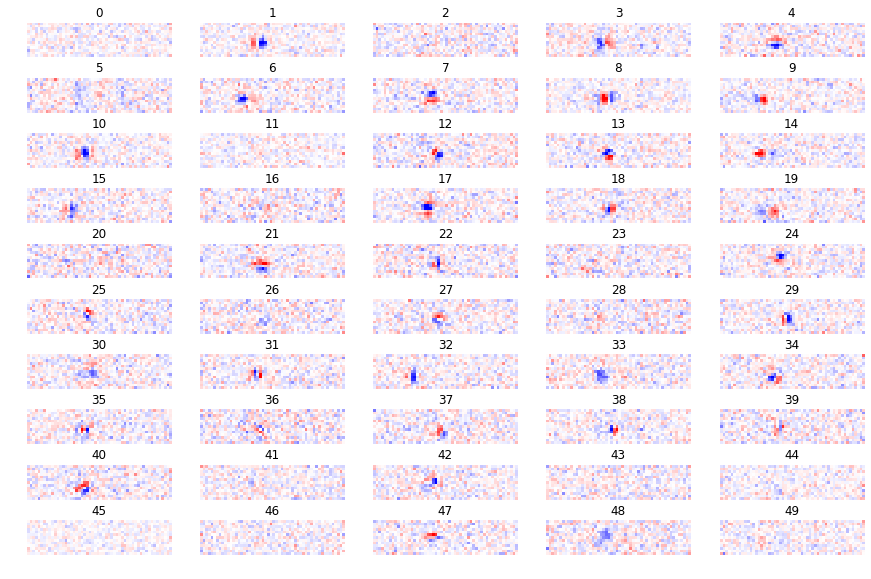

In [18]:

fig=plt.figure(figsize=(15, 10))
for ind1 in range(50):
    #vmin=np.min(assembly_array[ind1,ind2,:])
    vmax=np.max(B) * 2/3
    plt.subplot(10, 5, ind1+1)
    plt.imshow(B[:,:,ind1],cmap='bwr',vmin=-vmax,vmax=vmax)
    plt.axis('off')
    plt.title(str(ind1))
    
plt.show()
